In [ ]:
# %pip install requests
# %pip install opencv-python
# %pip install pillow
# %pip install matplotlib


In [75]:
import requests, base64, json, cv2
import matplotlib.pyplot as plt
import numpy as np
from io import BytesIO
from PIL import Image

In [66]:
def decode(encoded_img):
    aux_path = 'tmp.png'
    with open(aux_path, "w+") as f:
        f.write(base64.b64decode(encoded_img))
        f.close()

    out = cv2.imread(aux_path)

    return out

## Get the box coordinates, confidence and classes

In [68]:
API_ENDPOINT = 'https://ni3gvh9foi.execute-api.us-east-1.amazonaws.com/boxes'
image_path = 'test_image.jpg'

#Read the image and convert it to a byte array representing png compressed image
img = cv2.imread(image_path)
is_success, im_buf_arr = cv2.imencode(".png", img)
byte_im = im_buf_arr.tobytes()

# Make request to the endpoint and convert it to JSON
r = requests.post(url=API_ENDPOINT, data=byte_im)
response = json.load(BytesIO(r.content))

# Here is the request
response

{'boxes': [[407.208740234375,
   303.0656433105469,
   521.4520263671875,
   402.5500793457031,
   0.9264129400253296,
   19.0],
  [275.0853271484375,
   233.8872833251953,
   321.672119140625,
   288.36688232421875,
   0.8914034962654114,
   25.0]],
 'ratios': {'x': 1.0, 'y': 0.75}}

##### sequence of parameters: x1,  y1,  x2,  y2,  confidence,  class ID. 
##### Ratios indicate how the submitted image was scaled before inference.

## Get the image showing the bounding boxes

In [72]:
API_ENDPOINT = 'https://ni3gvh9foi.execute-api.us-east-1.amazonaws.com/image'

img = cv2.imread('test_image.jpg')
is_success, im_buf_arr = cv2.imencode(".png", img)
byte_im = im_buf_arr.tobytes()

r = requests.post(url=API_ENDPOINT, data=byte_im)
img_ = Image.open(BytesIO(r.content))

img_to_show = np.asarray(img_)

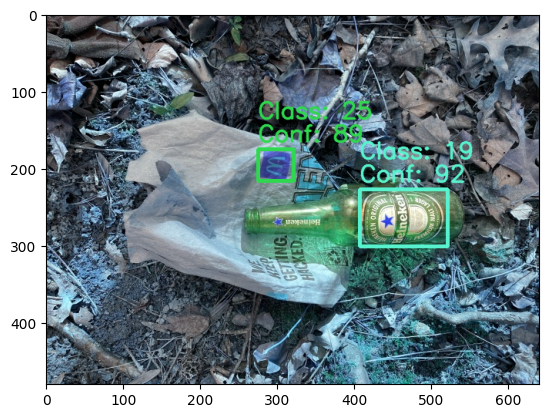

In [76]:
plt.imshow(img_to_show)